<a href="https://colab.research.google.com/github/DivyaNarayan0613/DivyaNarayan0613/blob/main/Topic_Modeling_and_Clustering_in_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy



In [ ]:
import sklearn
from sklearn.datasets import fetch_20newsgroups



In [ ]:
groups = fetch_20newsgroups()


In [ ]:
groups.keys()


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
groups['target_names']


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
groups.target


array([7, 4, 4, ..., 3, 1, 8])

In [ ]:
import numpy as np
np.unique(groups.target)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

<ipython-input-8-c36af1f94acb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(groups.target)


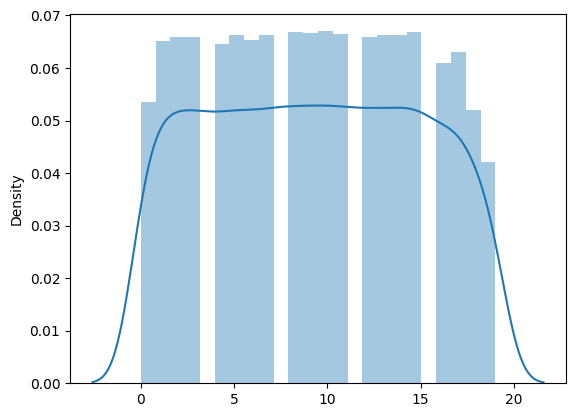

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(groups.target)
plt.show()

In [ ]:
groups.data[0]
groups.target[0]
groups.target_names[groups.target[0]]


'rec.autos'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(max_features=500)


In [ ]:
data_count = count_vector.fit_transform(groups.data)
data_count
data_count[0]
data_count.toarray()
data_count.toarray()[0]
print(count_vector.get_feature_names_out())


['00' '000' '10' '100' '11' '12' '13' '14' '145' '15' '16' '17' '18' '19'
 '1993' '20' '21' '22' '23' '24' '25' '26' '27' '30' '32' '34' '40' '50'
 '93' 'a86' 'able' 'about' 'above' 'ac' 'access' 'actually' 'address'
 'after' 'again' 'against' 'ago' 'all' 'already' 'also' 'always' 'am'
 'american' 'an' 'and' 'andrew' 'another' 'answer' 'any' 'anyone'
 'anything' 'apple' 'apr' 'april' 'are' 'armenian' 'around' 'article' 'as'
 'ask' 'at' 'au' 'available' 'away' 'ax' 'b8f' 'back' 'bad' 'based' 'be'
 'because' 'been' 'before' 'being' 'believe' 'best' 'better' 'between'
 'bible' 'big' 'bill' 'bit' 'book' 'both' 'but' 'buy' 'by' 'ca' 'call'
 'called' 'came' 'can' 'canada' 'cannot' 'car' 'card' 'case' 'cc' 'center'
 'change' 'children' 'chip' 'christian' 'clipper' 'co' 'code' 'color'
 'com' 'come' 'computer' 'control' 'could' 'course' 'cs' 'current' 'data'
 'david' 'day' 'days' 'de' 'department' 'did' 'didn' 'different' 'disk'
 'distribution' 'do' 'does' 'doesn' 'doing' 'don' 'done' 'dos' 'do

In [ ]:
data_cleaned = []
for doc in groups.data:
    doc_cleaned = ' '.join(word for word in doc.split()
                                         if word.isalpha())
    data_cleaned.append(doc_cleaned)
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(ENGLISH_STOP_WORDS)


frozenset({'whereupon', 'whenever', 'has', 'several', 'because', 'somewhere', 'been', 'whom', 'onto', 'cant', 'meanwhile', 'twenty', 'much', 'detail', 'becoming', 'afterwards', 'have', 'are', 'all', 'keep', 'anywhere', 'front', 'well', 'will', 'ourselves', 'therein', 'etc', 'more', 'upon', 'together', 'anyway', 'nothing', 'he', 'full', 'top', 'when', 'per', 'without', 'call', 'sometime', 'another', 'empty', 'again', 'nor', 'everything', 'go', 'co', 'she', 'thick', 'whose', 'side', 'became', 'same', 'while', 'behind', 'indeed', 'wherever', 'how', 'amount', 'seemed', 'on', 'hereafter', 'thru', 'back', 'four', 'moreover', 'bottom', 'herein', 'further', 'something', 'beside', 'around', 'or', 'seeming', 'there', 'sometimes', 'itself', 'against', 'never', 'yourselves', 'though', 'toward', 'either', 'than', 'do', 'anything', 'throughout', 'the', 'nobody', 'from', 'couldnt', 'whoever', 'mill', 'also', 'mine', 'often', 'sincere', 'about', 'it', 'we', 'those', 'fifteen', 'whereafter', 'very', 'w

In [ ]:
count_vector_sw = CountVectorizer(stop_words="english", max_features=500)

In [ ]:
pip install nltk

In [ ]:
pip install nltk.download('names')

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `pip install nltk.download('names')'


In [ ]:
import nltk  # Make sure NLTK is imported
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import names

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])  # Disable unnecessary components

# Get the list of names from NLTK corpus
nltk.download('names')
all_names = set(names.words())

# Initialize CountVectorizer with stop words and max features
count_vector_sw = CountVectorizer(stop_words="english", max_features=500)

# Data cleaning process using spaCy
data_cleaned = []
for doc in groups.data:
    doc = doc.lower()  # Convert document to lowercase
    doc_spacy = nlp(doc)  # Process the document using spaCy NLP pipeline

    # Lemmatize, filter alphabetic words, and remove names
    doc_cleaned = ' '.join(token.lemma_ for token in doc_spacy
                           if token.is_alpha and token.text not in all_names)

    data_cleaned.append(doc_cleaned)

# Fit and transform the cleaned data using CountVectorizer
data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)


[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


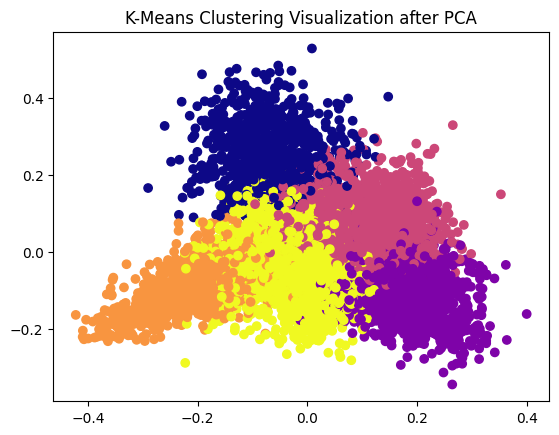

In [ ]:
import nltk
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import names
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])  # Disable unnecessary components

# Get the list of names from NLTK corpus
nltk.download('names')
all_names = set(names.words())

# Initialize TF-IDF Vectorizer with stop words and max features
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=500)

# Data cleaning process using spaCy
data_cleaned = []
for doc in groups.data:
    doc = doc.lower()  # Convert document to lowercase
    doc_spacy = nlp(doc)  # Process the document using spaCy NLP pipeline

    # Lemmatize, filter alphabetic words, and remove names
    doc_cleaned = ' '.join(token.lemma_ for token in doc_spacy
                           if token.is_alpha and token.text not in all_names)

    data_cleaned.append(doc_cleaned)

# Fit and transform the cleaned data using TF-IDF Vectorizer
data_tfidf = tfidf_vectorizer.fit_transform(data_cleaned)

# Perform K-Means Clustering
num_clusters = 5  # Define the number of clusters you want
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_tfidf)

# Predict cluster labels for each document
cluster_labels = kmeans.predict(data_tfidf)

# Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_tfidf.toarray())  # Convert sparse matrix to array before PCA

# Visualize the clusters
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=cluster_labels, cmap='plasma')
plt.title("K-Means Clustering Visualization after PCA")
plt.show()


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 5  # Define number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(data_tfidf)

# Get topics
terms = tfidf_vectorizer.get_feature_names_out()

def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print_top_words(lda, terms)


Topic #0:
key line chip use subject organization posting host nntp write
Topic #1:
game car team year article write line player university organization
Topic #2:
god say write people christian jesus israel article think believe
Topic #3:
people write gun article right think say law just make
Topic #4:
window use line thank file subject organization university card drive



/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


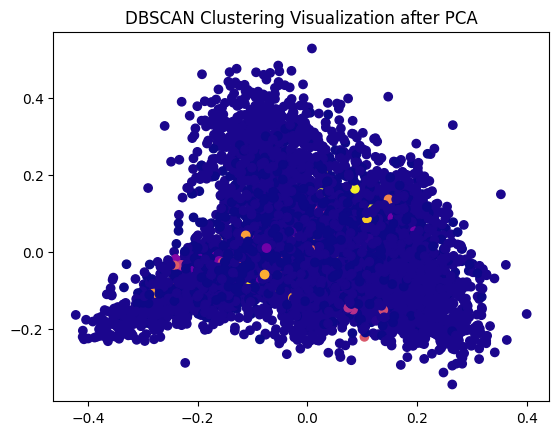

In [ ]:
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import names
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Get the list of names from NLTK corpus
nltk.download('names')
all_names = set(names.words())

# Initialize TF-IDF Vectorizer with stop words and max features
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=500)

# Data cleaning process using spaCy
data_cleaned = []
for doc in groups.data:
    doc = doc.lower()  # Convert document to lowercase
    doc_spacy = nlp(doc)  # Process the document using spaCy NLP pipeline

    # Lemmatize, filter alphabetic words, and remove names
    doc_cleaned = ' '.join(token.lemma_ for token in doc_spacy
                           if token.is_alpha and token.text not in all_names)

    data_cleaned.append(doc_cleaned)

# Fit and transform the cleaned data using TF-IDF Vectorizer
data_tfidf = tfidf_vectorizer.fit_transform(data_cleaned)

# Perform DBSCAN clustering
# eps: The maximum distance between two samples for them to be considered as in the same neighborhood
# min_samples: The number of samples in a neighborhood for a point to be considered a core point
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')  # Using cosine similarity as the metric
cluster_labels = dbscan.fit_predict(data_tfidf)

# Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_tfidf.toarray())  # Convert sparse matrix to array before PCA

# Visualize the clusters
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=cluster_labels, cmap='plasma')
plt.title("DBSCAN Clustering Visualization after PCA")
plt.show()


In [ ]:
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import names
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Get the list of names from NLTK corpus
nltk.download('names')
all_names = set(names.words())

# Initialize TF-IDF Vectorizer with stop words and max features
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=500)

# Data cleaning process using spaCy
data_cleaned = []
for doc in groups.data:
    doc = doc.lower()  # Convert document to lowercase
    doc_spacy = nlp(doc)  # Process the document using spaCy NLP pipeline

    # Lemmatize, filter alphabetic words, and remove names
    doc_cleaned = ' '.join(token.lemma_ for token in doc_spacy
                           if token.is_alpha and token.text not in all_names)

    data_cleaned.append(doc_cleaned)

# Fit and transform the cleaned data using TF-IDF Vectorizer
data_tfidf = tfidf_vectorizer.fit_transform(data_cleaned)

# Apply Latent Dirichlet Allocation (LDA) for Topic Modeling
num_topics = 5  # Specify the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(data_tfidf)

# Function to display topics
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

# Display top words for each topic
num_top_words = 10  # Specify how many top words to show for each topic
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(lda, tfidf_feature_names, num_top_words)


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


Topic 0:
key line chip use subject organization posting host nntp write
Topic 1:
game car team year article write line player university organization
Topic 2:
god say write people christian jesus israel article think believe
Topic 3:
people write gun article right think say law just make
Topic 4:
window use line thank file subject organization university card drive


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Define the number of topics
num_topics = 5  # This is the number of topics we want to extract

# Fit the LDA model on the document-term matrix
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(data_cleaned_count)

# Get document-to-topic distribution
doc_topic_dist = lda.transform(data_cleaned_count)

# Print topic distribution for each document (first 5 for brevity)
for i, topic_dist in enumerate(doc_topic_dist[:5]):
    print(f"Document {i}:")
    for topic, prob in enumerate(topic_dist):
        print(f" - Topic {topic}: {prob:.4f}")


Document 0:
 - Topic 0: 0.0061
 - Topic 1: 0.5921
 - Topic 2: 0.0062
 - Topic 3: 0.0062
 - Topic 4: 0.3894
Document 1:
 - Topic 0: 0.0059
 - Topic 1: 0.2455
 - Topic 2: 0.0058
 - Topic 3: 0.0058
 - Topic 4: 0.7370
Document 2:
 - Topic 0: 0.0082
 - Topic 1: 0.1666
 - Topic 2: 0.1254
 - Topic 3: 0.0025
 - Topic 4: 0.6973
Document 3:
 - Topic 0: 0.1674
 - Topic 1: 0.0047
 - Topic 2: 0.0046
 - Topic 3: 0.3053
 - Topic 4: 0.5179
Document 4:
 - Topic 0: 0.2997
 - Topic 1: 0.1476
 - Topic 2: 0.0049
 - Topic 3: 0.2603
 - Topic 4: 0.2875


In [ ]:
!pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.5 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim import matutils
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from sklearn.feature_extraction.text import CountVectorizer

# Sample data (replace this with your actual text data)
documents = [
    "Quantum computing is the future.",
    "Artificial intelligence and machine learning are transforming technology.",
    "The intersection of quantum computing and AI is exciting."
]

# Create a CountVectorizer
count_vectorizer = CountVectorizer()
data_cleaned_count = count_vectorizer.fit_transform(documents)

# Convert sklearn's document-term matrix to a gensim-compatible format
data_cleaned_count_gensim = matutils.Sparse2Corpus(data_cleaned_count, documents_columns=False)

# Prepare dictionary (gensim expects a Dictionary object)
id2word = Dictionary([count_vectorizer.get_feature_names_out()])

# Train LDA model
num_topics = 2  # Set the number of topics you want to extract
lda = LdaModel(data_cleaned_count_gensim, num_topics=num_topics, id2word=id2word, passes=15)

# Prepare the PyLDAvis visualization using gensim format
lda_vis = gensimvis.prepare(lda, data_cleaned_count_gensim, id2word)

# Display the visualization in the notebook
pyLDAvis.display(lda_vis)


In [ ]:
print(lda.print_topics())


[(0, '0.111*"the" + 0.111*"quantum" + 0.111*"is" + 0.111*"computing" + 0.067*"intersection" + 0.067*"of" + 0.067*"ai" + 0.067*"exciting" + 0.067*"future" + 0.066*"and"'), (1, '0.091*"and" + 0.091*"transforming" + 0.090*"artificial" + 0.090*"are" + 0.090*"technology" + 0.090*"intelligence" + 0.090*"learning" + 0.090*"machine" + 0.031*"computing" + 0.031*"is"')]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Training LDA model...")
lda = LdaModel(data_cleaned_count_gensim, num_topics=num_topics, id2word=id2word, passes=15)
print("LDA model trained successfully.")
print("LDA topics:", lda.print_topics())


Training LDA model...
LDA model trained successfully.
LDA topics: [(0, '0.111*"the" + 0.111*"quantum" + 0.111*"is" + 0.111*"computing" + 0.067*"intersection" + 0.067*"ai" + 0.067*"of" + 0.067*"exciting" + 0.067*"future" + 0.066*"and"'), (1, '0.091*"and" + 0.091*"transforming" + 0.091*"artificial" + 0.091*"are" + 0.091*"machine" + 0.091*"intelligence" + 0.091*"learning" + 0.091*"technology" + 0.031*"future" + 0.031*"computing"')]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim import corpora
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
from gensim import matutils

# Sample data (replace this with your actual text data)
documents = [
    "Quantum computing is the future.",
    "Artificial intelligence and machine learning are transforming technology.",
    "The intersection of quantum computing and AI is exciting."
]

# Create a CountVectorizer
count_vectorizer = CountVectorizer()
data_cleaned_count = count_vectorizer.fit_transform(documents)

# Ensure that data_cleaned_count is a sparse matrix
if not hasattr(data_cleaned_count, "tocoo"):
    raise ValueError("data_cleaned_count should be a sparse matrix.")

# Convert sklearn's document-term matrix to a gensim-compatible format
data_cleaned_count_gensim = matutils.Sparse2Corpus(data_cleaned_count, documents_columns=False)

# Create a gensim Dictionary from the CountVectorizer's vocabulary
id2word = corpora.Dictionary([[word for word in count_vectorizer.get_feature_names_out()]])

# Train LDA model
num_topics = 2  # Set the number of topics you want to extract
lda = LdaModel(data_cleaned_count_gensim, num_topics=num_topics, id2word=id2word, passes=15)

# Check if LDA model is trained successfully
print("LDA topics:", lda.print_topics())

# Prepare the pyLDAvis visualization using gensim format
lda_vis = gensimvis.prepare(lda, data_cleaned_count_gensim, id2word)

# Display the visualization
pyLDAvis.display(lda_vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA topics: [(0, '0.091*"and" + 0.091*"learning" + 0.091*"transforming" + 0.091*"intelligence" + 0.091*"machine" + 0.091*"are" + 0.091*"artificial" + 0.091*"technology" + 0.031*"future" + 0.031*"the"'), (1, '0.111*"computing" + 0.111*"quantum" + 0.111*"is" + 0.111*"the" + 0.067*"exciting" + 0.067*"of" + 0.067*"intersection" + 0.067*"ai" + 0.067*"future" + 0.066*"and"')]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


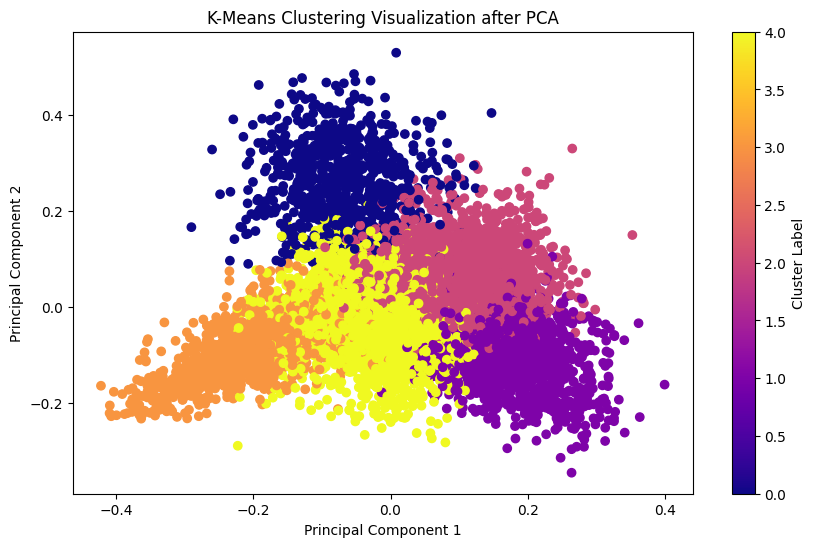

In [ ]:
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import names
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Get the list of names from NLTK corpus
nltk.download('names')
all_names = set(names.words())

# Initialize TF-IDF Vectorizer with stop words and max features
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=500)

# Data cleaning process using spaCy
data_cleaned = []
for doc in groups.data:
    doc = doc.lower()  # Convert document to lowercase
    doc_spacy = nlp(doc)  # Process the document using spaCy NLP pipeline

    # Lemmatize, filter alphabetic words, and remove names
    doc_cleaned = ' '.join(token.lemma_ for token in doc_spacy
                           if token.is_alpha and token.text not in all_names)

    data_cleaned.append(doc_cleaned)

# Fit and transform the cleaned data using TF-IDF Vectorizer
data_tfidf = tfidf_vectorizer.fit_transform(data_cleaned)

# Perform K-Means Clustering
num_clusters = 5  # Define the number of clusters you want
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_tfidf)

# Predict cluster labels for each document
cluster_labels = kmeans.predict(data_tfidf)

# Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_tfidf.toarray())  # Convert sparse matrix to array before PCA

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=cluster_labels, cmap='plasma')
plt.title("K-Means Clustering Visualization after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
pip install threadpoolctl==2.2.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uninstalled threadpoolctl-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.16.2 requires threadpoolctl<4.0.0,>=3.1.0, but you have threadpoolctl 2.2.0 which is incompatible.
scikit-learn 1.5.2 requires threadpoolctl>=3.1.0, but you have threadpoolctl 2.2.0 which is incompatible.


In [ ]:
import nltk
import spacy
from nltk.corpus import names
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data_tfidf.toarray(), 'ward')  # Use 'ward' method for hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=groups.target_names, distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()
# Using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_tfidf.toarray())

# Visualize t-SNE results
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=cluster_labels, cmap='plasma')
plt.title("t-SNE Visualization of Clusters")
plt.show()

NameError: name 'data_tfidf' is not defined